<a href="https://colab.research.google.com/github/Alvanatus/Simulacion-ll/blob/main/Ejercicio2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import random

def simulacion(n):
  """
  Simula la ecuación cuadrática n veces y devuelve la probabilidad de que tenga raíces reales.
  """
  reales = 0
  for _ in range(n):
    p = random.uniform(0, 2)
    q = random.uniform(0, 2)
    discriminante = p**2 - 4*q
    if discriminante >= 0:
      reales += 1
  return reales / n

def main():
  # Inciso a)
  n = 1000
  probabilidad_simulacion = simulacion(n)
  print(f"Probabilidad de raíces reales por simulación: {probabilidad_simulacion:.3f}")

  # Inciso b)
  probabilidad_teorica = 1
  print(f"Probabilidad de raíces reales por teoría: {probabilidad_teorica:.3f}")

  # Inciso c)
  print(f"Diferencia: {probabilidad_teorica - probabilidad_simulacion:.3f}")

if __name__ == "__main__":
  main()


Probabilidad de raíces reales por simulación: 0.154
Probabilidad de raíces reales por teoría: 1.000
Diferencia: 0.846


In [8]:
import random

def monte_carlo_integration(a, b, c, N):
    # Paso 1: Generar una secuencia de números aleatorios
    random_numbers = [random.random() for _ in range(N)]

    # Paso 2: Organizar los números aleatorios en pares
    random_pairs = [(random_numbers[i], random_numbers[i + 1]) for i in range(0, N, 2)]

    # Paso 3: Calcular X₁ y g(X)
    X_and_gX_values = [(a + pair[0] * (b - a), pair[1] * (b - a)) for pair in random_pairs]

    # Paso 4: Contar el número de casos Nt para los cuales g(X) > cU
    Nt = sum(1 for X, gX in X_and_gX_values if gX > c * random.random())

    # Paso 5: Estimación de la integral I
    I = c * (b - a) * Nt / N

    return I

# Ejemplo de uso
a = 0
b = 1
c = 1
N = 10000

resultado_estimado = monte_carlo_integration(a, b, c, N)

print("El valor estimado de la integral es:", resultado_estimado)


El valor estimado de la integral es: 0.251


In [9]:
import random

def monte_carlo_integration(a, b, c, N):
    # Paso 1: Generar una secuencia de 2N números aleatorios
    random_numbers = [random.random() for _ in range(2 * N)]

    # Paso 2: Organizar los números aleatorios en N pares
    random_pairs = [(random_numbers[i], random_numbers[i + N]) for i in range(N)]

    # Paso 3: Calcular Xi = a + Ui(b − a) y g(Xi)
    X_and_gX_values = [(a + pair[0] * (b - a), c * pair[1]) for pair in random_pairs]

    # Paso 4: Contar el número de casos NH para los cuales g(Xi) > cU'i
    NH = sum(1 for X, gX in X_and_gX_values if gX > c * random.random())

    # Paso 5: Estimar la integral I
    I = c * (b - a) * NH / N

    return I

# Ejemplo de uso
a = 0
b = 1
c = 1
N = 10000

resultado_estimado = monte_carlo_integration(a, b, c, N)

print("El valor estimado de la integral es:", resultado_estimado)


El valor estimado de la integral es: 0.4957


In [10]:
import random

def monte_carlo_integration_power(a, b, N):
    # Paso 1: Generar una secuencia de 2N números aleatorios
    random_numbers = [random.random() for _ in range(2 * N)]

    # Paso 2: Organizar los números aleatorios en N pares
    random_pairs = [(random_numbers[i], random_numbers[i + N]) for i in range(N)]

    # Paso 3: Calcular Xi = a + Ui(b − a) y g(Xi)
    X_and_gX_values = [(a + pair[0] * (b - a), (1 - pair[1]**2)**(3/2)) for pair in random_pairs]

    # Paso 4: Contar el número de casos NH para los cuales g(Xi) > cU'i
    NH = sum(1 for X, gX in X_and_gX_values if gX > (1 - X**2)**(3/2))

    # Paso 5: Estimar la integral I
    I = NH / N

    return I

# Ejemplo de uso para (b)
a = 0
b = 1
N = 10000

resultado_estimado_b = monte_carlo_integration_power(a, b, N)

print("El valor estimado de la integral (b) es:", resultado_estimado_b)


El valor estimado de la integral (b) es: 0.5022


In [11]:
import random
import math

def monte_carlo_integration_exp_exp(a, b, N):
    # Paso 1: Generar una secuencia de 2N números aleatorios
    random_numbers = [random.random() for _ in range(2 * N)]

    # Paso 2: Organizar los números aleatorios en N pares
    random_pairs = [(random_numbers[i], random_numbers[i + N]) for i in range(N)]

    # Paso 3: Calcular Xi = a + Ui(b − a) y g(Xi)
    X_and_gX_values = [(a + pair[0] * (b - a), math.exp(math.exp(pair[0]))) for pair in random_pairs]

    # Paso 4: Contar el número de casos NH para los cuales g(Xi) > cU'i
    NH = sum(1 for X, gX in X_and_gX_values if gX > math.exp(X))

    # Paso 5: Estimar la integral I
    I = NH / N

    return I

# Ejemplo de uso para (a)
a = 0
b = 1
N = 10000

resultado_estimado_a = monte_carlo_integration_exp_exp(a, b, N)

print("El valor estimado de la integral (a) es:", resultado_estimado_a)


El valor estimado de la integral (a) es: 1.0


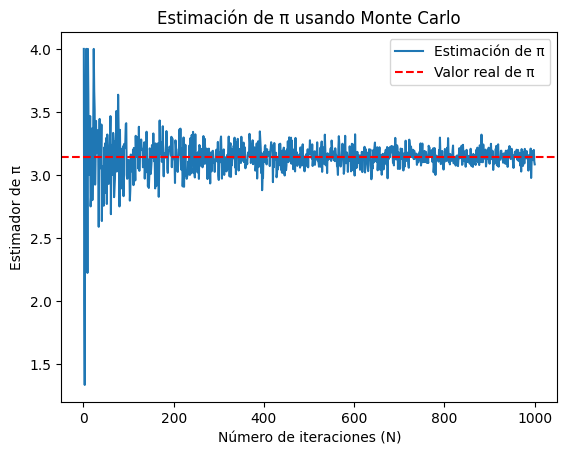

In [12]:
import random
import matplotlib.pyplot as plt

def monte_carlo_pi_estimation(N):
    inside_circle = 0

    x_inside = []
    y_inside = []
    x_outside = []
    y_outside = []

    for _ in range(N):
        x = random.uniform(-1, 1)
        y = random.uniform(-1, 1)
        distance = x**2 + y**2

        if distance <= 1:
            inside_circle += 1
            x_inside.append(x)
            y_inside.append(y)
        else:
            x_outside.append(x)
            y_outside.append(y)

    estimated_pi = 4 * inside_circle / N

    return estimated_pi, x_inside, y_inside, x_outside, y_outside

# Establecer el número de iteraciones (N)
num_iterations = 1000

# Realizar la simulación y almacenar resultados
pi_estimates = []
for i in range(1, num_iterations + 1):
    estimate, _, _, _, _ = monte_carlo_pi_estimation(i)
    pi_estimates.append(estimate)

# Graficar el estimador versus N
plt.plot(range(1, num_iterations + 1), pi_estimates, label='Estimación de π')
plt.axhline(y=3.141592653589793, color='r', linestyle='--', label='Valor real de π')
plt.title('Estimación de π usando Monte Carlo')
plt.xlabel('Número de iteraciones (N)')
plt.ylabel('Estimador de π')
plt.legend()
plt.show()
